In [1]:
import torch

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

from model import Model
from custom_utils import load_diseases_data, load_diseases_test_data
from nets import FF

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_images, train_labels, test_images, test_labels = load_diseases_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([1894, 150, 100]),
 torch.Size([1894, 5, 2]),
 torch.Size([335, 150, 100]),
 torch.Size([335, 5, 2]))

In [2]:
net = torch.load('../main_models/disease_ff.pt')

In [3]:
images, labels = load_diseases_test_data()

x = []

for i in range(5):
    x.append(str((torch.argmax(net(images), axis=-1)[:, i] == torch.argmax(labels, axis=-1)[:, i]).sum().item() / labels.size(0) * 100))

x.append(str((torch.argmax(net(images), axis=-1) == torch.argmax(labels, axis=-1)).sum().item() / labels.size(0) * 20))

with open('seperate.csv', 'a') as file:
    file.write('Fully Connected NN,' + ','.join(x) + '\n')

In [5]:
(torch.argmax(net(images), axis=-1) == torch.argmax(labels, axis=-1)).sum().item() / labels.size(0) * 20

84.08759124087592

In [4]:
train_labels.shape

torch.Size([1894, 5, 2])

In [16]:
print( 'train mse:', torch.nn.MSELoss()( net(train_images), train_labels ).item() )
print( 'test mse:', torch.nn.MSELoss()( net(test_images), test_labels ).item() )

train mse: 0.0917828381061554
test mse: 0.08371403813362122


In [20]:
print('train accuracy:', (torch.argmax(net(train_images), axis=-1) == torch.argmax(train_labels, axis=-1)).sum().item() / train_labels.size(0) * 20)
print('test accuracy:', (torch.argmax(net(test_images), axis=-1) == torch.argmax(test_labels, axis=-1)).sum().item() / test_labels.size(0) * 20)

train accuracy: 87.45512143611404
test accuracy: 88.4776119402985


In [4]:
net = FF().to(device)
net

FF(
  (d1): Linear(in_features=15000, out_features=200, bias=True)
  (d2): Linear(in_features=200, out_features=50, bias=True)
  (d3): Linear(in_features=50, out_features=10, bias=True)
  (tanh): Tanh()
)

In [5]:
disease_indxs = torch.unique(torch.where(train_labels[:, :, 1] == 1)[0])
disease_indxs.shape

torch.Size([1308])

In [6]:
model = Model(
    model=net, 
    train_input=train_images, #[disease_indxs], 
    train_label=train_labels, #[disease_indxs],
    test_input=test_images,
    test_label=test_labels
)

In [7]:

model.compile(
    optimizer=torch.optim.Adam, 
    lr=0.001,
    loss=torch.nn.MSELoss()
)

In [8]:

model.train(
    epochs=1000,
    batch_size=16
)

EPOCH [1/1000], ====================> 100%, Loss = 0.09054894745349884, Accuracy = 86.25
Loss = 0.13130, Accuracy = 82.574%
Test loss = 0.12244, Test accuracy = 81.970%
EPOCH [2/1000], ====================> 100%, Loss = 0.11217933148145676, Accuracy = 82.5
Loss = 0.11771, Accuracy = 83.506%
Test loss = 0.11593, Test accuracy = 83.642%
EPOCH [3/1000], ====================> 100%, Loss = 0.14082352817058563, Accuracy = 81.25
Loss = 0.11865, Accuracy = 83.252%
Test loss = 0.12007, Test accuracy = 81.254%
EPOCH [4/1000], ====================> 100%, Loss = 0.117076076567173, Accuracy = 85.05
Loss = 0.12438, Accuracy = 82.511%
Test loss = 0.12301, Test accuracy = 83.881%
EPOCH [5/1000], ====================> 100%, Loss = 0.11320061981678009, Accuracy = 85.0
Loss = 0.12832, Accuracy = 82.108%
Test loss = 0.12000, Test accuracy = 83.582%
EPOCH [6/1000], ====================> 100%, Loss = 0.12516720592975616, Accuracy = 82.5
Loss = 0.12577, Accuracy = 81.801%
Test loss = 0.11480, Test accuracy =

KeyboardInterrupt: 

In [9]:
torch.where(test_labels[:, 3, 1] == 1)

(tensor([  3,   6,  48,  51,  53, 109, 110, 137, 138, 168, 169, 206, 209, 287],
        device='cuda:0'),)

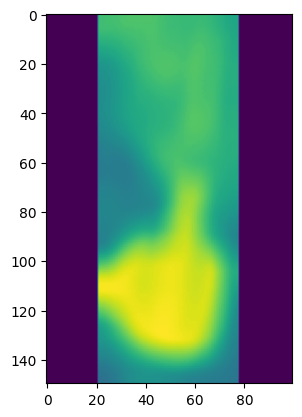

In [10]:
plt.imshow(test_images[3].cpu().numpy())

In [11]:
net(test_images[None, 3])

tensor([[[0.9105, 0.0895],
         [0.3752, 0.6245],
         [0.8770, 0.1230],
         [0.9330, 0.0670],
         [0.7910, 0.2090]]], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)

<Figure size 640x480 with 0 Axes>

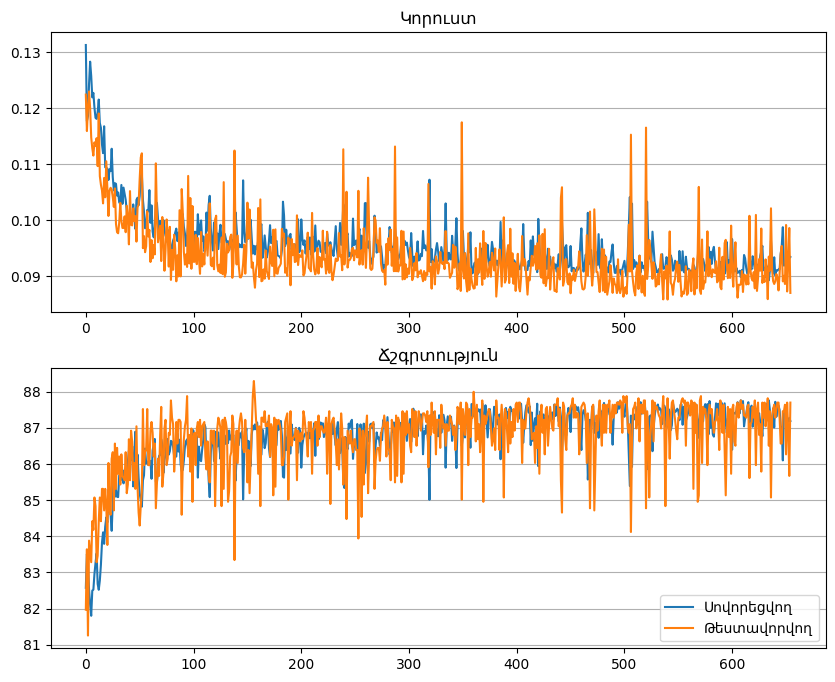

In [12]:
model.draw_plots()

In [13]:
# torch.save(net, '../models/disease_ff.pt')